# python期末项目--如何选择你未来的城市

**项目介绍** 
- 项目人：罗佳莼
- 时间：2020年7月
- 数据源：来源于国家数据库
- 目标：帮助即将毕业的大学生选择合适的工作/居住城市

# 导入模块

In [2]:
import pandas as pd

In [3]:
from pyecharts.charts import Geo
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType

# 定义css

In [4]:
%%html
<style>
/* 本电子讲义使用之CSS */
div.code_cell {
    background-color: #fceae6
}
div.cell.selected {
    background-color: #e6eefe;
    font-size: 2rem;
    line-height: 2.4rem;
}
div.cell.selected .rendered_html table {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html pre code {
    background-color: #C4E4ff;   
    padding: 2px 25px;
}
.rendered_html pre {
    background-color: #99c9ff;
}
div.code_cell .CodeMirror {
    font-size: 2rem !important;
    line-height: 2.4rem !important;
}
.rendered_html img, .rendered_html svg {
    max-width: 60%;
    height: auto;
    float: right;
}

.rendered_html img[src*="#full"], .rendered_html svg[src*="#full"] {
    max-width: 95%;
    height: auto;
}

.rendered_html img[src*="#thumbnail"], .rendered_html svg[src*="#thumbnail"] {
    max-width: 15%;
    height: auto;
}

/* Gradient transparent - color - transparent */
hr {
    border: 0;
    border-bottom: 1px dashed #ccc;
}
.emoticon{
    font-size: 5rem;
    line-height: 4.4rem;
    text-align: center;
    vertical-align: middle;
}
.bg-split_apply_comine {
    width: 500px;     
    height: 300px;
    background: url('02_split-apply-comine_500x300.png') -10px -10px;
    float: right;
}
.bg-comine {
    width: 175px;
    height: 150px;
    background: url('02_split-apply-comine_500x300.png') -280px -80px;
    float: right;
}
.bg-apply {
    width: 155px;
    height: 225px;
    background: url('02_split-apply-comine_500x300.png') -160px -30px;
    float: right;
}
.bg-split {
    width: 205px;
    height: 225px;
    background: url('02_split-apply-comine_500x300.png') -10px -30px;
    float: right;
}
.break {
                   page-break-after: right; 
                   width:700px;
                   clear:both;
}
</style>

# 数据读取

In [38]:
df = pd.read_excel("省份选择.xlsx", encoding="utf8", sep="\t")
df.head()

,地区,年份,农村居民消费水平(元),城镇居民消费水平(元),地区生产总值(亿元),年末常住人口(万人),城镇人口(万人),乡村人口(万人),人口出生率(‰),人口死亡率(‰),...,城镇登记失业人数(万人),供水综合生产能力(万立方米/日),人工煤气生产能力(万立方米/日),建成区绿化覆盖率(%),旱灾受灾面积(千公顷 ),洪涝、山体滑坡、泥石流和台风受灾面积(千公顷 ),地震灾害次数(次),结婚登记(万对 ),离婚登记(万对),粗离婚率(‰)
0,北京市,2017,26132,57100,28014.94,2171,1878,293,9.06,5.30,...,8.10,2178.74,NaN,48.4,NaN,NaN,NaN,15.15,8.06,3.71
1,北京市,2016,24285,52721,25669.13,2173,1880,293,9.32,5.20,...,7.99,2452.45,NaN,48.4,NaN,16.1,NaN,16.62,10.58,4.89
2,北京市,2015,22315,41846,23014.59,2171,1877,293,7.96,4.95,...,7.85,2496.71,NaN,48.4,0.2,0.7,NaN,16.60,8.22,3.79
3,北京市,2014,20506,38515,21330.83,2152,1858,294,9.75,4.92,...,7.43,2439.77,NaN,49.1,26.1,NaN,NaN,17.00,6.56,3.08
4,北京市,2013,17663,35836,19800.81,2115,1825,290,8.93,4.52,...,7.53,2554.53,NaN,47.1,NaN,9.8,NaN,16.37,6.46,3.06


# 分进合击出报表

## 制表分析比较各年份地区的地区生产总值

### 分进合击
- 分析比较各年份地区的地区生产总值

In [6]:
# A-1 採用进阶分进合击分析策略 groupby ... agg  ... pivot
分进合击进阶pv = df.groupby(by= ["地区","年份"]) \
                  .agg({"地区生产总值(亿元)":"sum"}) \
                  .reset_index() \
                  .set_index(["地区"]) \
                  .pivot(columns="年份", values="地区生产总值(亿元)")
print (分进合击进阶pv.shape)
分进合击进阶pv

(31, 5)


年份,2013,2014,2015,2016,2017
地区,,,,,
上海市,21818.15,23567.70,25123.45,28178.65,30632.99
云南省,11832.31,12814.59,13619.17,14788.42,16376.34
内蒙古自治区,16916.50,17770.19,17831.51,18128.10,16096.21
北京市,19800.81,21330.83,23014.59,25669.13,28014.94
吉林省,13046.40,13803.14,14063.13,14776.80,14944.53
四川省,26392.07,28536.66,30053.10,32934.54,36980.22
天津市,14442.01,15726.93,16538.19,17885.39,18549.19
宁夏回族自治区,2577.57,2752.10,2911.77,3168.59,3443.56
安徽省,19229.34,20848.75,22005.63,24407.62,27018.00


### 分进合击pivot_table

In [7]:
# A-3 採用分进合击初阶分析策略  pivot_table
分进合击进阶 = df.pivot_table(index= "地区", columns="年份",  \
                 values="地区生产总值(亿元)", aggfunc="sum") 
print (分进合击进阶.shape)
分进合击进阶

(31, 5)


年份,2013,2014,2015,2016,2017
地区,,,,,
上海市,21818.15,23567.70,25123.45,28178.65,30632.99
云南省,11832.31,12814.59,13619.17,14788.42,16376.34
内蒙古自治区,16916.50,17770.19,17831.51,18128.10,16096.21
北京市,19800.81,21330.83,23014.59,25669.13,28014.94
吉林省,13046.40,13803.14,14063.13,14776.80,14944.53
四川省,26392.07,28536.66,30053.10,32934.54,36980.22
天津市,14442.01,15726.93,16538.19,17885.39,18549.19
宁夏回族自治区,2577.57,2752.10,2911.77,3168.59,3443.56
安徽省,19229.34,20848.75,22005.63,24407.62,27018.00


### 按总值排序

In [8]:
# A-3 pivot_table 按总值排序
排序 = 分进合击进阶.sum(axis=1).sort_values(ascending=False).index
排序
排序_总值 = 分进合击进阶.sum(axis=1).sort_values(ascending=False).values
排序_总值
分进合击进阶_排序过 =  分进合击进阶.loc[排序]
分进合击进阶_排序过
分进合击进阶_排序过['总值'] = 排序_总值
分进合击进阶_排序过

年份,2013,2014,2015,2016,2017,总值
地区,,,,,,
广东省,62474.79,67809.85,72812.55,80854.91,89705.23,373657.33
江苏省,59753.37,65088.32,70116.38,77388.28,85869.76,358216.11
山东省,55230.32,59426.59,63002.33,68024.49,72634.15,318317.88
浙江省,37756.59,40173.03,42886.49,47251.36,51768.26,219835.73
河南省,32191.30,34938.24,37002.16,40471.79,44552.83,189156.32
四川省,26392.07,28536.66,30053.10,32934.54,36980.22,154896.59
河北省,28442.95,29421.15,29806.11,32070.45,34016.32,153756.98
湖北省,24791.83,27379.22,29550.19,32665.38,35478.09,149864.71
湖南省,24621.67,27037.32,28902.21,31551.37,33902.96,146015.53


### 制表

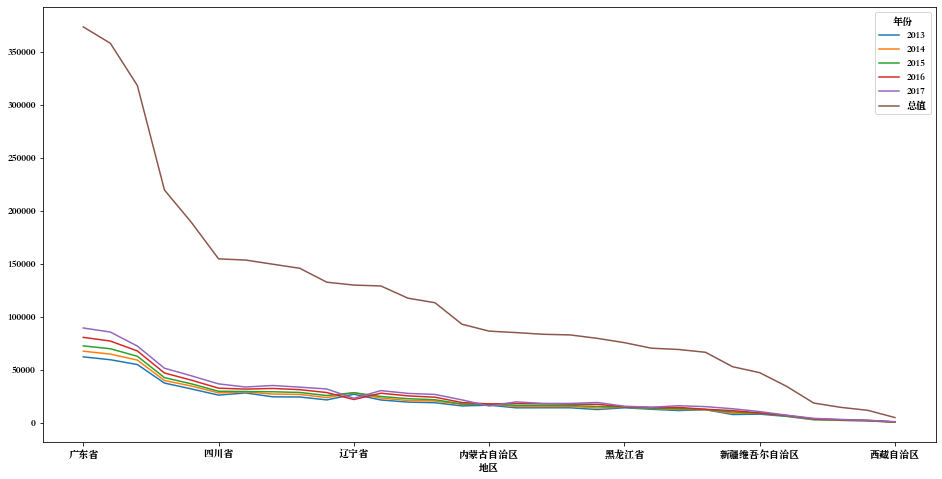

In [9]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Songti SC']
分进合击进阶_排序过.plot(figsize=(16,8))

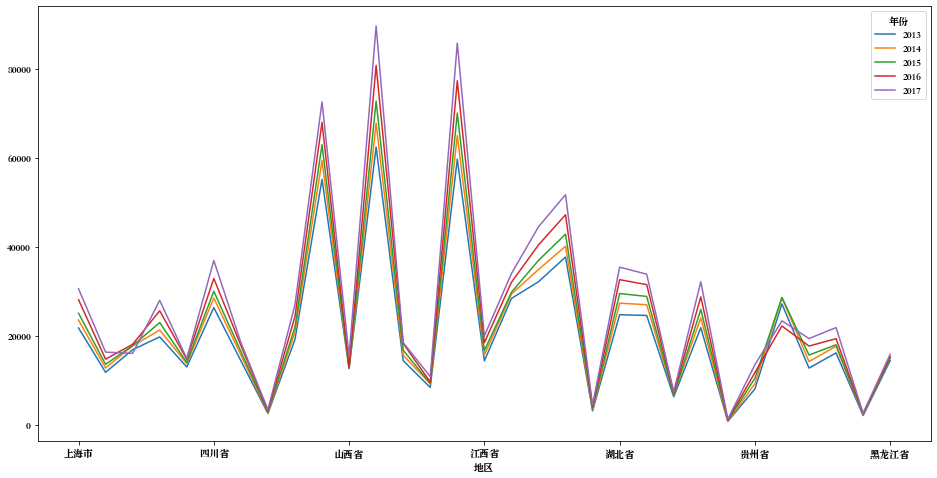

In [10]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Songti SC']
分进合击进阶.plot(figsize=(16,8))

### 结论

- 广东省的地区生产总值近几年来一直稳居第一
- 西藏地区的地区生产总值较低，经济环境相对落后
- 因此，追求经济发展的毕业生可以考虑向广东省发展定居


## 各地失业人数分析

In [11]:
import matplotlib as mpl

In [15]:
失业人数 = df.groupby(by= ["地区","年份"]) \
                  .agg({"城镇登记失业人数(万人)":"sum"}) \
                  .reset_index() \
                  .set_index(["年份"]) \
                  .pivot(columns="地区", values="城镇登记失业人数(万人)")

失业人数

地区,上海市,云南省,内蒙古自治区,北京市,吉林省,四川省,天津市,宁夏回族自治区,安徽省,山东省,...,湖南省,甘肃省,福建省,西藏自治区,贵州省,辽宁省,重庆市,陕西省,青海省,黑龙江省
年份,,,,,,,,,,,,,,,,,,,,,
2013,25.30,18.09,23.80,7.53,22.61,42.87,21.69,4.69,32.36,42.15,...,45.65,9.30,14.70,1.63,13.66,39.55,12.07,21.06,4.23,41.37
2014,25.63,19.19,24.77,7.43,23.18,54.36,22.52,5.00,31.45,43.07,...,47.29,9.71,14.35,1.69,14.09,40.96,13.42,22.35,4.22,39.85
2015,24.81,19.47,25.87,7.85,23.88,54.64,25.08,4.94,30.91,43.69,...,45.10,9.48,15.41,1.77,14.49,46.15,14.26,22.35,4.44,40.98
2016,24.26,20.10,26.71,7.99,25.72,56.26,25.77,5.10,30.45,45.84,...,44.94,9.77,16.26,1.84,14.78,47.33,15.68,22.74,4.58,39.58
2017,22.06,19.81,27.08,8.10,26.27,55.78,26.00,5.07,28.99,45.75,...,44.46,9.65,17.15,1.95,14.90,42.72,14.26,23.44,4.67,39.74


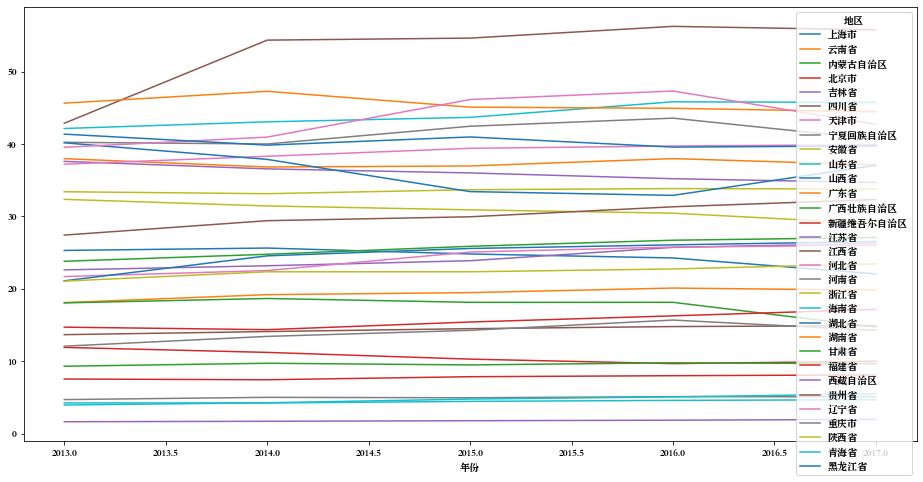

In [16]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Songti SC']
失业人数.plot(figsize=(16,8))

### 结论

- 各省份中事业人数变动最大的是贵州省，在2013年-2014年失业人数急速上涨，并且一直保持巨高不下的水平，可能发生巨大变动
- 因此毕业生想选择贵族省定居的需要着重考虑下将来的失业问题

## 幸福指数分析

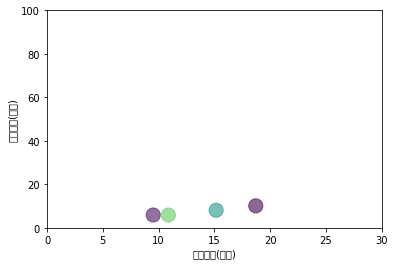

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 输入产量与温度数据
jh = [15.15, 9.51, 50.49, 18.7, 10.87, 62.58, 75.81]
lh = [8.06, 5.89, 23.24, 10.09, 5.88, 27.25, 22.03]
#city = [北京市, 天津市, 河北省, 内蒙古自治区, 上海市, 山东省, 广东省]
lhv = [3.71, 3.78, 3.1, 4, 2.43, 2.58, 1.99]

colors = np.random.rand(len(lh))  # 颜色数组
#size = production
plt.scatter(jh, lh, s=200, c=colors, alpha=0.6)  # 画散点图, alpha=0.6 表示不透明度为 0.6
plt.ylim([0, 100])  # 纵坐标轴范围
plt.xlim([0, 30])   # 横坐标轴范围
plt.xlabel('结婚登记(万对)')  # 横坐标轴标题
plt.ylabel('离婚登记(万对)')  # 纵坐标轴标题
plt.show()


### 结论

- 对所选的几个经济较发达或者生活环境较好的省份相比较幸福率
- 其中结果为粗离婚率较高的为内蒙古自治区
- 粗离婚率较低的为广东省
- 追求生活幸福美满的毕业生可以考虑向广东省定居

## 	农村居民消费水平(元)	城镇居民消费水平(元)	地区生产总值(亿

In [30]:
xf = df.groupby(by= ["农村居民消费水平(元)","城镇居民消费水平(元)"]) \
 #                 .agg({"地区生产总值(亿元)":"sum"}) \
 #                 .reset_index() \
  #                .set_index(["地区"]) \
  #                .pivot(columns="年份", values="地区生产总值(亿元)")
#print (分进合击进阶pv.shape)
xf

KeyError: '农村居民消费水平(元)'

In [ ]:
students.plot.bar(x='Field',y='Number',color='green',title='Students Field sorted by Number')
plt.tight_layout()
plt.show()

In [39]:
df.head()

,地区,年份,农村居民消费水平(元),城镇居民消费水平(元),地区生产总值(亿元),年末常住人口(万人),城镇人口(万人),乡村人口(万人),人口出生率(‰),人口死亡率(‰),...,城镇登记失业人数(万人),供水综合生产能力(万立方米/日),人工煤气生产能力(万立方米/日),建成区绿化覆盖率(%),旱灾受灾面积(千公顷 ),洪涝、山体滑坡、泥石流和台风受灾面积(千公顷 ),地震灾害次数(次),结婚登记(万对 ),离婚登记(万对),粗离婚率(‰)
0,北京市,2017,26132,57100,28014.94,2171,1878,293,9.06,5.30,...,8.10,2178.74,NaN,48.4,NaN,NaN,NaN,15.15,8.06,3.71
1,北京市,2016,24285,52721,25669.13,2173,1880,293,9.32,5.20,...,7.99,2452.45,NaN,48.4,NaN,16.1,NaN,16.62,10.58,4.89
2,北京市,2015,22315,41846,23014.59,2171,1877,293,7.96,4.95,...,7.85,2496.71,NaN,48.4,0.2,0.7,NaN,16.60,8.22,3.79
3,北京市,2014,20506,38515,21330.83,2152,1858,294,9.75,4.92,...,7.43,2439.77,NaN,49.1,26.1,NaN,NaN,17.00,6.56,3.08
4,北京市,2013,17663,35836,19800.81,2115,1825,290,8.93,4.52,...,7.53,2554.53,NaN,47.1,NaN,9.8,NaN,16.37,6.46,3.06


# 时空交互

# 空间分析

In [29]:
import datetime
import numpy as np
import pandas as pd

In [42]:
绿化覆盖 = df.groupby(by= ["地区","年份"])\
                         .agg({"建成区绿化覆盖率(%)":"sum"})\

#                         .rename(columns={"独角兽":"数量"})
绿化覆盖#.数量.to_dict() #.index

建成区绿化覆盖率(%)
地区   年份               
上海市  2013         38.4
     2014         38.4
     2015         38.5
     2016         38.6
     2017         39.1
...                ...
黑龙江省 2013         36.0
     2014         36.0
     2015         35.8
     2016         35.4
     2017         35.5

[155 rows x 1 columns]

In [55]:
# 各地区人员平均工资排序
绿化 = 绿化覆盖.groupby(["地区"]).agg({"建成区绿化覆盖率(%)":["min","max","mean"]}).sort_values(by=("建成区绿化覆盖率(%)","mean"))
绿化

建成区绿化覆盖率(%)             
                 min   max   mean
地区                               
青海省             29.8  32.6  31.26
甘肃省             30.2  33.3  31.58
西藏自治区           18.1  43.8  34.38
吉林省             31.4  36.1  34.82
贵州省             34.0  37.0  35.64
黑龙江省            35.4  36.0  35.74
天津市             34.9  37.2  36.04
新疆维吾尔自治区        36.4  40.0  37.84
湖北省             37.5  38.4  37.90
云南省             37.3  38.9  37.98
广西壮族自治区         37.6  39.3  38.26
河南省             37.6  39.4  38.46
上海市             38.4  39.1  38.60
四川省             37.5  40.0  38.90
宁夏回族自治区         37.9  40.4  39.04
内蒙古自治区          36.2  40.2  39.06
湖南省             37.6  41.2  39.54
辽宁省             36.4  40.7  39.54
山西省             40.0  40.6  40.26
陕西省             39.9  40.6  40.26
海南省             37.7  42.1  40.30
浙江省             40.3  41.0  40.62
重庆市             40.3  41.7  40.74
安徽省             39.9  42.2  41.24
河北省             40.8  41.9  41.38
广东省             41.4  43.5  42.04
山东省             42.1  42.8  42.42
江苏省             42.4  43.0  42.74
福建省             42.8  43.7  43.12
江西省             43.6  45.2  44.52
北京市             47.1  49.1  48.28

In [33]:
data_world = [(k, v) for k, v in 绿化覆盖.to_dict().items()]  
data_world

[('建成区绿化覆盖率(%)',
  {('上海市', 2013): 38.4,
   ('上海市', 2014): 38.4,
   ('上海市', 2015): 38.5,
   ('上海市', 2016): 38.6,
   ('上海市', 2017): 39.1,
   ('云南省', 2013): 37.8,
   ('云南省', 2014): 38.1,
   ('云南省', 2015): 37.3,
   ('云南省', 2016): 37.8,
   ('云南省', 2017): 38.9,
   ('内蒙古自治区', 2013): 36.2,
   ('内蒙古自治区', 2014): 39.8,
   ('内蒙古自治区', 2015): 39.2,
   ('内蒙古自治区', 2016): 39.9,
   ('内蒙古自治区', 2017): 40.2,
   ('北京市', 2013): 47.1,
   ('北京市', 2014): 49.1,
   ('北京市', 2015): 48.4,
   ('北京市', 2016): 48.4,
   ('北京市', 2017): 48.4,
   ('吉林省', 2013): 31.4,
   ('吉林省', 2014): 35.8,
   ('吉林省', 2015): 36.1,
   ('吉林省', 2016): 35.0,
   ('吉林省', 2017): 35.8,
   ('四川省', 2013): 38.4,
   ('四川省', 2014): 37.5,
   ('四川省', 2015): 38.7,
   ('四川省', 2016): 39.9,
   ('四川省', 2017): 40.0,
   ('天津市', 2013): 34.9,
   ('天津市', 2014): 34.9,
   ('天津市', 2015): 36.4,
   ('天津市', 2016): 37.2,
   ('天津市', 2017): 36.8,
   ('宁夏回族自治区', 2013): 38.5,
   ('宁夏回族自治区', 2014): 38.0,
   ('宁夏回族自治区', 2015): 37.9,
   ('宁夏回族自治区', 2016): 40.4,
   ('宁夏回族自治区', 2

In [64]:
# Pyecharts Geo：地理坐标系 例子
from pyecharts.charts import Geo
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Geo
from pyecharts.globals import ChartType, SymbolType
def geo_base() -> Geo:
    c = (
        Geo()
        .add_schema(maptype="china")
        .add("geo", [list(z) for z in zip(Faker.provinces, Faker.values())])
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        .set_global_opts(
            visualmap_opts=opts.VisualMapOpts(),
            title_opts=opts.TitleOpts(title="中国城市地区"),
        )
    )
    return c

中国城市地区 = geo_base()
中国城市地区.render_notebook()

## 结论

- 中国各省份的绿化建设普遍较好
- 各省份的绿化覆盖率也在逐年稳步上升

# 总结

- 对于即将毕业或刚毕业的大学生而言，在那个省份/城市定居生活工作是需要仔细考虑的，工作地的选择直接影响到今后的生活与发展。针对这一痛点，我将从国家数据库得来的数据进行筛选处理与分析，得到了如上的报告，仅供参考。
- 广东、山东、河南作为人口大省，对人们的包容性更大，但同时就业压力更大
- 沿海地区的生产总值较高，北上广依旧是发展个人能力与实现经济自由的不二选择
- 黑龙江、吉林、重庆的离婚率虽然在全国而言较高，但也不能代表这里的人们不幸福
- 毕业后工作地的选择要根据自己和家人的意愿以及当地的各方面发展作为条件，希望每位毕业生都有光明美好的前途